### 분류 알고리즘 메서드 및 모듈 정리
* DecisionTreeClassifier() : 결정 트리 객체 생성
* feature_importances_ : 피처의 중요도, 중요도를 ndarray 형태로 반환, 생성된 Estimator에 적용
* get_params() : 현재 Estimator의 파라미터, 생성된 Estimator에 적용
* GridSearchCV() 관련
 * best_score_ : GridSearchCV 최고 예측 정확도, 하이퍼 파라미터 튜닝된 객체에 적용
 * best_params_ : GridSearchCV 최적 하이퍼 파라미터, 하이퍼 파라미터 튜닝된 객체에 적용
 * cv_results_ : GridSearchCV의 결과 반환, 하이퍼 파라미터 튜닝된 객체에 적용
 * best_estimator_ : GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator 반환, 하이퍼 파라미터 튜닝된 객체에 적용
* VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf), ..], voting = 'soft') : 보팅 방식의 앙상블 객체 생성, 입력 인자로 estimators와 voting을 받음
* `__class__.__name__` : 알고리즘 이름을 추출 가능, 생성된 Estimator에 적용
* RandomForestClassifier(n_estimators = ) : 랜덤 포레스트 객체 생성, 입력 인자로 분류기의 갯수를 받음
* GradientBoostingClassifier() : GBM 객체 생성

# 1. 분류(Classification)의 개요
* 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 대 미지의 레이블 값을 예측
* 대표적인 분류 알고리즘들
 * 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
 * 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
 * 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
 * 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
 * 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
 * 심층 연결 기반의 신경망(Neural Network)
 * 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)
* 앙상블은 결정 트리 기반이며, 앙상블과 결정 트리에 관해 자세히 알아보도록 함

* 결정 트리와 앙상블
 * 결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘
 * 또한 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
 * 하지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인해 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수 있다는 단점이 있음
 * 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용
 * 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문 (GBM, XGBoost, LightGBM 등)

# 2. 결정 트리
* 결정 트리 알고리즘은 데이터에 있는 `규칙`을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듦(If-Else 기반 규칙)
* 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우
* 또한, 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 복잡해진다는 얘기이므로, 이는 과적합으로 이어짐
* 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음<br>
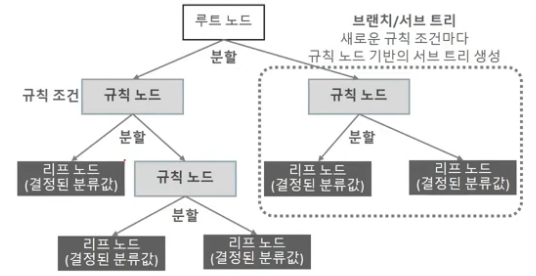<br>
=> 규칙 노드(Decision Node) / 브랜치 노드(Branch Node) : 규칙 조건이 됨<br>
=> 리프 노드(Leaf Node) : 결정된 클래스 값. 즉, 해당 노드가 균일한 값을 가짐<br>
=> 서브 트리(Sub Tree) : 새로운 규칙 조건마다 생성<br>

* 트리 분할을 위한 데이터의 균일도<br>
 * C -> B -> A 순으로 균일도가 높다.<BR>
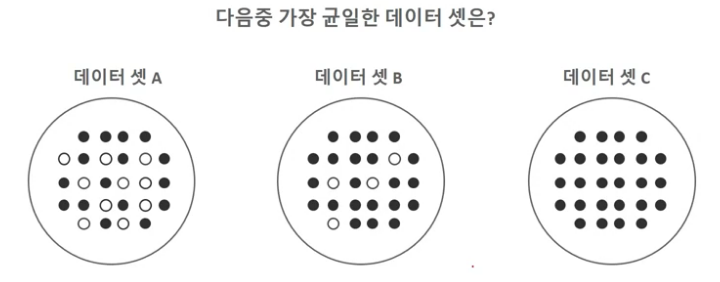<br>

* 균일도 기반 규칙 조건
 * 노랑색 블록의 경우 모두 동그라미로 구성되고, 빨강과 파랑 블록의 경우는 동그라미, 네모, 세모가 골고루 섞여 있다고 한다면 각 레고의 블록을 분류하고자 할 대 가장 첫 번째로 만들어져야 하는 규칙 조건은 ?
 * if 색깔 == '노란색'<BR>
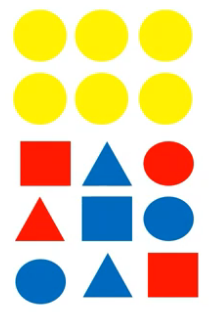

* 정보 균일도 측정 방법
 * 정보 이득(Information Gain) : 정보 이득은 엔트로피(불확실성)라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값임. 즉, 1-엔트로피 지수. 결정 트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할
 * 지니 계수 : 지니계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 경제학자인 코라도 지니의 이름에서 딴 계수로서 0이 가장 평등하고, 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석되어 계수가 낮은 속성을 기준으로 분할함<BR>
=> 즉, 정보이득은 클수록 균일하고 지니계수는 작을수록 균일함을 의미하므로, 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정

* 결정 트리의 규칙 노드 생성 프로세스<br>
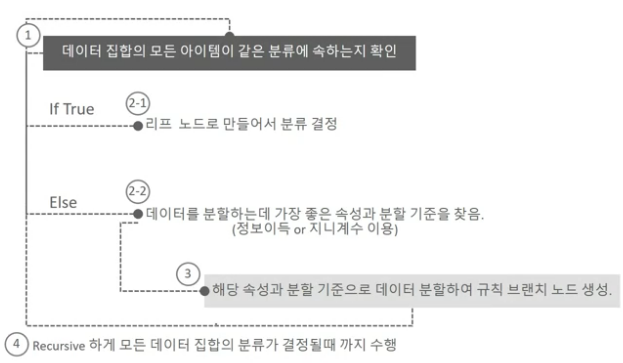

### 결정 트리 모델의 특징<br>
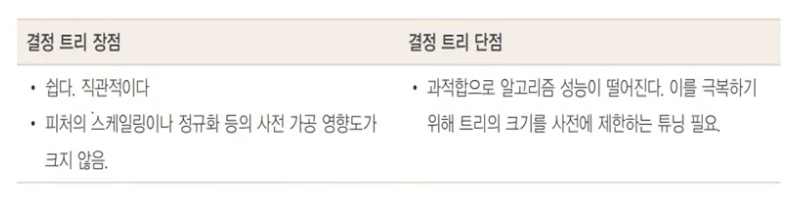

### 결정 트리 파라미터<br>
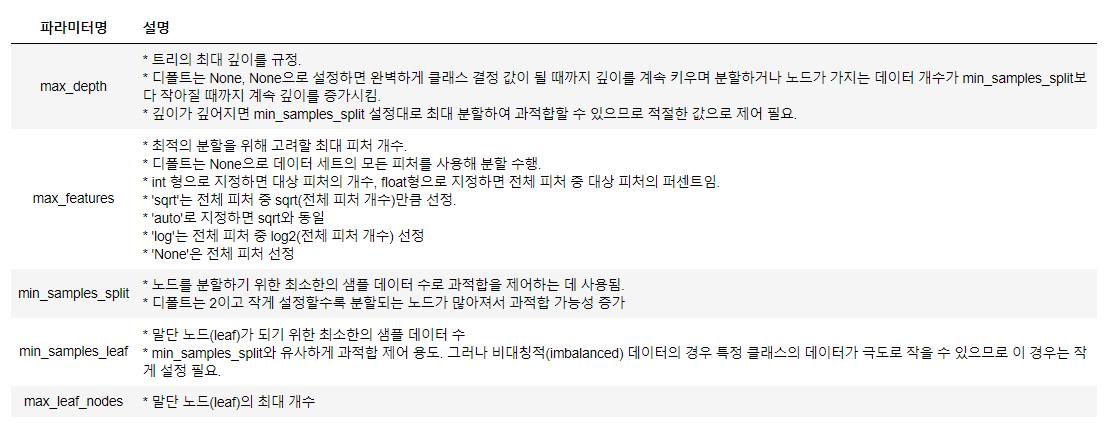
   

### Graphviz를 이용한 결정 트리 모델의 시각화
 * 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법
 * Graphviz는 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
 * 그래프 형태로 시각화할 수 있는 출력파일을 생성해주는 export_graphviz() API를 제공
   * export_graphviz(Estimator, output 파일명, 레이블 이름 리스트, 피처 이름 리스트)
 * 생성된 출력 파일을 graphviz의 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현
 * 붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 Graphviz를 이용하여 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
# tree 모델의 내부가 어떻게 흘러가고 있는지 시각적으로 확인할 수 있는 모듈
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity = True, filled = True)

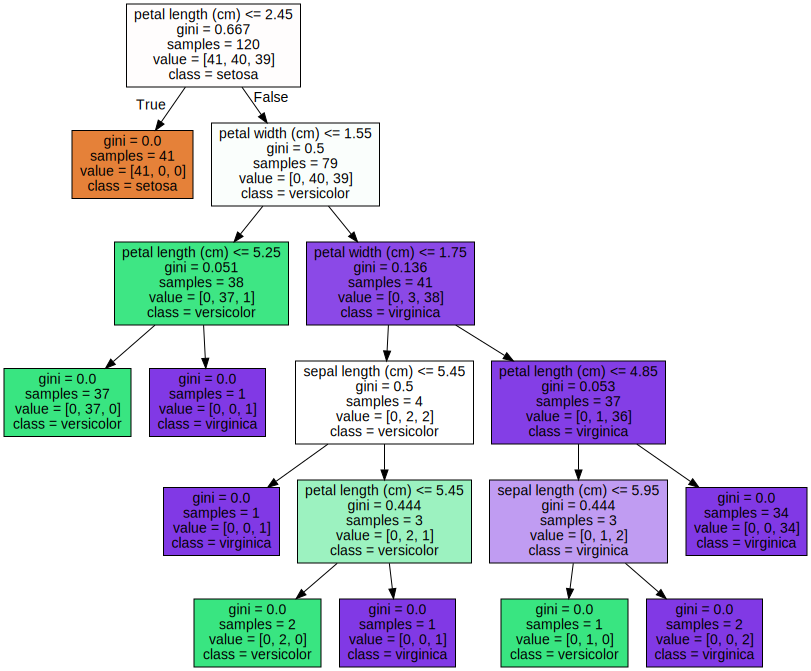

In [3]:
# tree.dot을 해석할 수 있는 모듈이 graphviz임
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook 상에서 시각화
# 파일을 읽고, graphviz의 Source에 파일을 넣으면 시각화해줌
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* Graphviz의 시각화 노드를 통한 하이퍼 파라미터 설명<br><br>

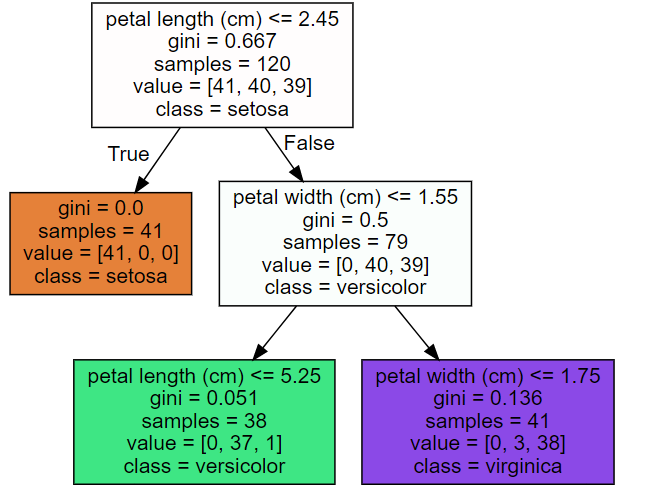<br>
 * petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드
 * gini는 다음의 value = []로 주어진 데이터 분포에서의 지니 계수
 * samples는 현 규칙에 해당하는 데이터 건수
 * value = []는 클래스 값 기반의 데이터 건수. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며, 0 : Setosa, 1 : Versicolor, 2 : Virginica 품종을 가리킴. 만일 Value = [41, 40, 39]라면 클래스 값 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미
 * class는 value 리스트 내에 가장 많은 건수를 가진 결정값<br>

=> 결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 감. 이로 인해 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 됨. 따라서 결정 트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도

### max_depth, min_samples_split, min_samples_leaf의 3가지 하이퍼 파라미터

* 1. max_depth에 따른 결정 트리 구조<br>
 * max_depth 하이퍼 파라미터는 결정 트리의 최대 트리 깊이를 제어함. max_depth를 제한 없음에서 3개로 설정하면 트리 깊이가 설정된 max_depth에 따라 줄어들면서 더 간단한 결정 트리가 됨
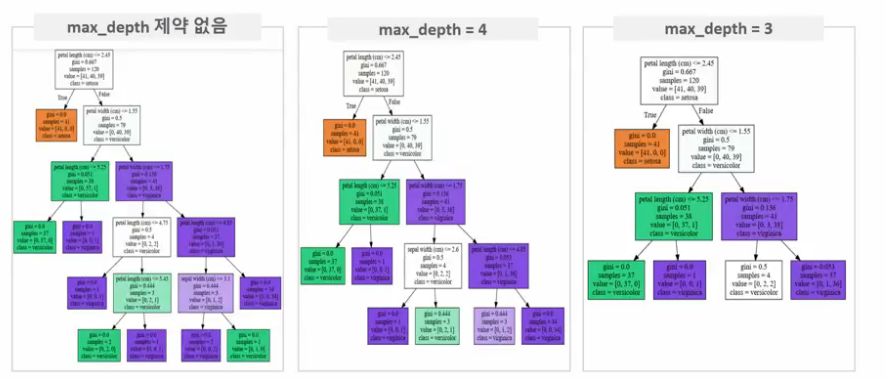<br>

* 2. min_samples_split에 따른 결정 트리 구조
 * 노드를 분할하기 위한 최소한의 샘플 데이터의 수<br>
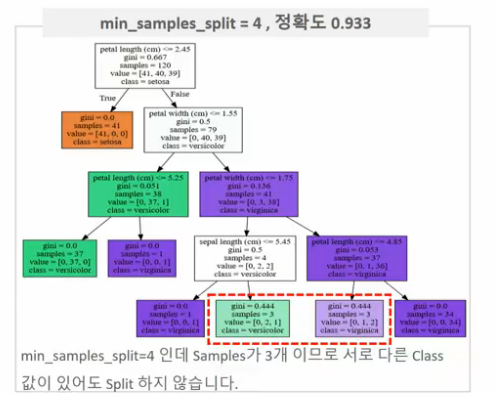

* 3. min_samples_leaf에 따른 결정 트리 구조<br>
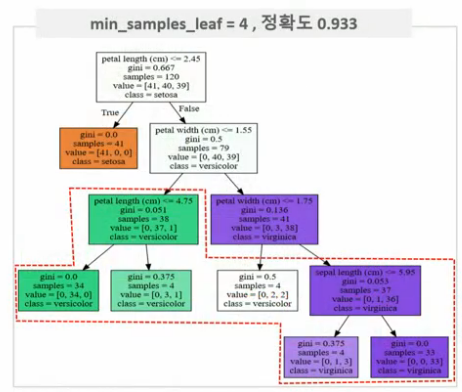<br>
=> Sample이 4 이하인 노드는 리프 클래스 노드가 될 수 있으므로 자연스럽게 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 만들어짐

### 결정 트리의 Feature 선택 중요도
 * 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_을 통해 제공
 * 즉, feature_importances_는 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

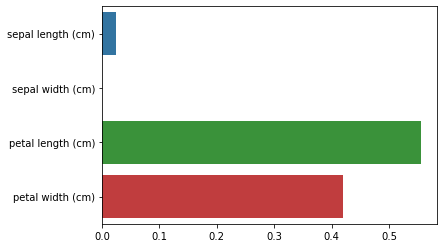

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
# ndarray 형태로 반환됨
# 이 때, estimator인 dt_clf는 fit()으로 학습된 DecisionTreeClassifier 객체
print('Feature importances : \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:0.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

=> 여러 피처들 중 petal_length가 가장 피처 중요도가 높음을 알 수 있음

### 결정 트리의 과적합(Overfitting)
 * 2개의 feature로 된 3개의 결정 클래스를 가지도록 make_classification() 함수를 이용하여 임의 데이터를 생성한 후 트리 생성 제약이 없는 경우와 min_samples_leaf = 6으로 제약을 주었을 때 분류 기준선의 변화<br>
 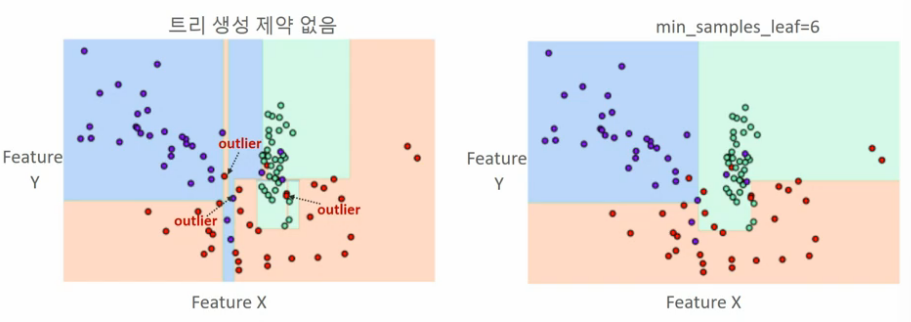<br>
=> 학습 데이터를 이렇게 잘게 쪼개는 것에 비해 테스트 데이터는 세밀한 분류값으로 들어오지 않을 확률이 높아서 문제가 됨
 

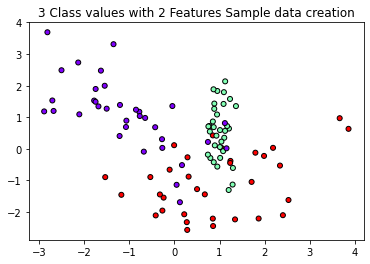

In [5]:
# make_classification은 샘플 데이터셋을 만들어주는 메서드
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, cmap = 'rainbow', edgecolor = 'k')

=> 각 피처가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 되어 있음<BR>
=> X_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습

In [6]:
# 지금 단계에서는 이해가 어려운 코드라 일단 우선 실행

import numpy as np

# Classification의 Decision Boundary를 시각화하는 함수
# 즉, 머신러닝 모델의 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해줌
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
               clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200), np.linspace(ylim_start, ylim_end, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contoursf = ax.contourf(xx, yy, Z, alpha = 0.3,
                            levels = np.arange(n_classes + 1) - 0.5,
                            cmap = 'rainbow', clim = (y.min(), y.max()),
                            zorder = 1)

* 1번째 학습 : 결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터를 디폴트로 설정

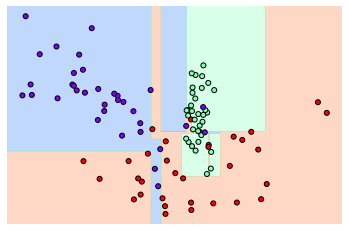

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

=> 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌음<br>
=> 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어짐

* 2번째 학습 : min_samples_leaf = 6이라는 파라미터를 설정

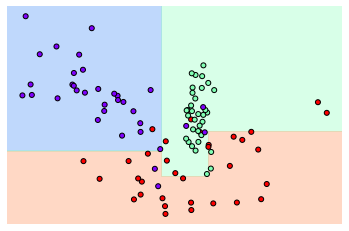

In [8]:
# 과적합을 제어하기 위해 min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

=> 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있음<br>
=> 이는 첫 번째 모델보다는 예측 성능이 더 뛰어날 가능성이 높음 (학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
 * 사용자 행동 인식 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터. 수집된 피처 세트를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측
 * 예측값
   * 1. WALKING
   * 2. WALKING_UPSTAIRS
   * 3. WALKING_DOWNSTAIRS
   * 4. SITTING
   * 5. STANDING
   * 6. LAYING

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 데이터프레임으로 로드
feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+', # \s는 whitespace를 나타내는 정규표현식
                              header = None, names = ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist() # 데이터프레임 -> ndarray -> 리스트
print('전체 피처명에서 10개만 추출 :', feature_name[:10])

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


=> 피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있음<BR>
=> 피처명을 가지는 데이터 프레임을 이용해 데이터 파일을 로딩하기 전에 유의해야 할 부분은 중복된 피처명을 가지고 있는다는 것

* 중복된 피처명을 확인

In [11]:
feature_dup_df = feature_name_df.groupby('column_name').count() # 피처명에 따라 그룹화하여 갯수 카운트
print(feature_dup_df[feature_dup_df['column_index'] > 1].count()) # 중복된 피처명의 개수 추출
feature_dup_df[feature_dup_df['column_index'] > 1].head(10) # 중복된 피처명을 가진 피처 확인

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


* 원본 데이터에 중복된 피처명으로 인하여 신규 버전의 pandas에서 Duplicate name 에러를 발생. 중복 피처명에 대해 원본 피처명에 '_1(또는 _2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [12]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '-' + str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [13]:
# cumcount() 함수 알아보기
df = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns = ['A'])
display(df)
df.groupby('A').cumcount() # 중복되지 않으면 카운트를 0, 중복되면 카운트를 1, 2, 3, ...

,A
0,a
1,a
2,a
3,b
4,b
5,a


0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

* 학습용 피처 데이터 세트, 레이블 데이터 세트 / 테스트용 피처 데이터 세트, 레이블 데이터 세트 로드

In [14]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                                  header = None, names = ['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 반환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


=> 전부 실수형이므로, 별도의 가공이 필요없음

In [16]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


=> 레이블 값의 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분표되어 있음

* 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:0.4f}'.format(accuracy), '\n')

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 :\n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548 

DecisionTreeClassifier 기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [18]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6, 8, 10, 12, 16, 20, 24],
          'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:0.4f}'.format(grid_cv.best_score_)) # 검증 데이터셋에 대한 적용
print('GridSearchCV 최적 하이퍼 파라머티 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라머티 : {'max_depth': 8, 'min_samples_split': 16}


In [13]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
# grid_cv.cv_results_는 원래 딕셔너리 형태이기 때문에 효과적으로 보기 위해 데이터프레임으로 변환
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그 때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


* 테스트 데이터 세트에서 max_depth의 변화에 따른 정확도 측정

In [15]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화시키면서 그 때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:0.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8551
max_depth = 8 정확도 : 0.8717
max_depth = 10 정확도 : 0.8599
max_depth = 12 정확도 : 0.8571
max_depth = 16 정확도 : 0.8599
max_depth = 20 정확도 : 0.8565
max_depth = 24 정확도 : 0.8565


* max_depth, min_samples_split을 같이 변경하면서 정확도 성능 튜닝

In [16]:
# 이번에는 min_samples_split까지 파라미터 추가해서 확인
params = {'max_depth':[8, 12, 16, 20],
          'min_samples_split':[16, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:0.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


=> 이전과 동일한 최적 하이퍼 파라미터를 확인

* 최적 하이퍼 파라미터에 예측 적용

In [17]:
best_df_clf = grid_cv.best_estimator_ # refit 옵션으로 인해 사실 이미 최적 하이퍼 파라미터로 학습이 되어있음
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:0.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


* 피처 중요도 확인 : feature_importances_ 속성 이용

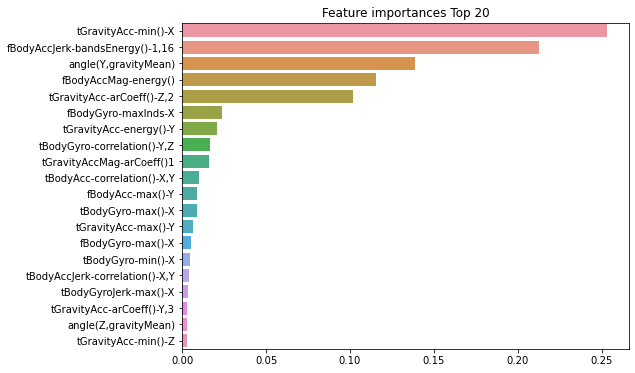

In [18]:
# 피처 중요도 확인

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_ # ndarray 형태

# Top 중요도로 정렬을 쉽게 하고, seaborn의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

=> Top5에 있는 피처들이 트리의 규칙 생성에 중요한 역할을 하고 있는 것을 확인할 수 있음

# 3. 앙상블 학습

### 앙상블 학습 개요
* 앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
* 어려운 문제의 결론을 내기 위해 여러 명의 전문가로 위원회를 구성해 다양한 의견을 수렴하고 결정하듯이 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것<br><br>

* 앙상블의 유형
 * 앙상블의 유형은 일반적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)으로 구분할 수 있으며, 이 외에 스태킹(Stacking) 등의 기법이 있음
 * 대표적인 배경은 랜덤 포레스트(Random Forest) 알고리즘이 있으며, 부스팅은 에이다 부스팅, 그래디언트 부스팅, XGBoost, LightGBM 등이 있음.
 * 정형 데이터의 분류나 회귀에서는 GBM 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타냄
 * 넓은 의미로는 서로 다른 모델을 결합한 것을 앙상블로 지칭하기도 함<br><br>
 
* 앙상블의 특징
 * 단일 모델의 약점을 다수의 모델들을 결합하여 보완
 * 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능에 도움이 될 수 있음
 * 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용함
 * 결정 트리의 단점인 과적합(오버피팅)을 수십 ~ 수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨<br><br>
 
* 보팅(Voting)과 배깅(Bagging) 개요
 * 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
 * 보팅과 배깅의 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
 * 좌측 그림인 보팅은 선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정하는 방식
 * 우측 그림인 배깅은 단일 알고리즘으로 결정 트리를 선택하여 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅과는 다름
 * 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 부름
 * 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용함<br>
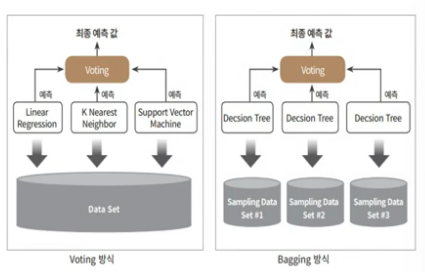

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)<br>
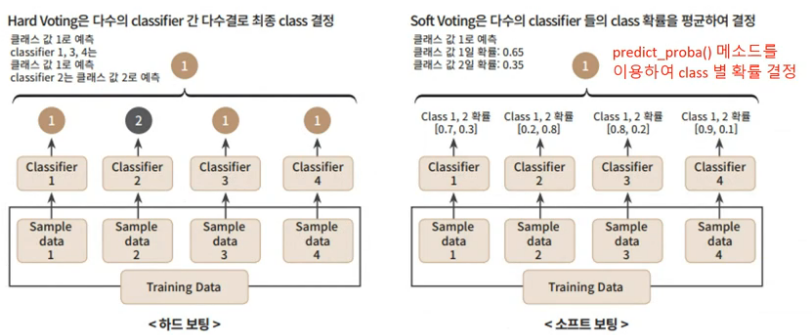<br>
* 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됨
* 사이킷런은 `VotingClassifier` 클래스를 통해 보팅(Voting)을 지원

### 보팅 분류기(Voting Classifier)

* 위스콘신 유방암 데이터 로드

In [30]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* VotingClassifier로 개별 모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교
 * VotingClassifier은 주요 생성 인자로 estimators와 voting 값을 입력받음
 * estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음
 * voting은 하드 보팅 시 'hard', 소프트 보팅 시 'soft'를 입력

In [32]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 6)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
# VotingClassifier의 옵션인 estimators는 리스트 내에 key와 value의 형태와 유사하게 알고리즘이 들어가있음
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 156)

# VotingClassifier 학습 / 예측 / 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test) # 예측 시 보팅을 통해 예측값 결정
print('Voting 분류기 정확도 : {0:0.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습 / 예측 / 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__ # __class__.__name__을 이용하면 class name을 추출 가능
    print('{0} 정확도 : {1:0.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9211


=> 보팅 분류기의 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음

# 4. 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습
* 배깅
  * 배깅의 대표적인 알고리즘은 랜덤 포레스트
  * 랜덤 포레스트는 다재 다능한 알고리즘
  * 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있음
  * 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨
  * 이 때, 데이터 샘플링은 부트스트랩 방식으로 수행<br>
  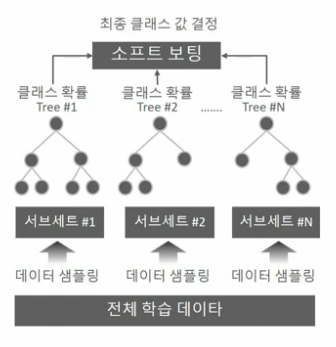<br>

* 랜덤 포레스트의 부트스트래핑 분할
 * 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 함. (그래서 배깅(Bagging)이 bootstrap aggregating이 줄임말임)
 * 원본 데이터의 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 `n_estimators = 3`으로 하이퍼 파라미터를 부여하면 다음과 같이 데이터 서브세트가 만들어짐.
 * 전체 데이터 세트와 데이터 서브세트의 샘플 수는 같음. 샘플 수를 같게 하기 위해서 중복된 데이터 세트를 추출하는 것임<br>
 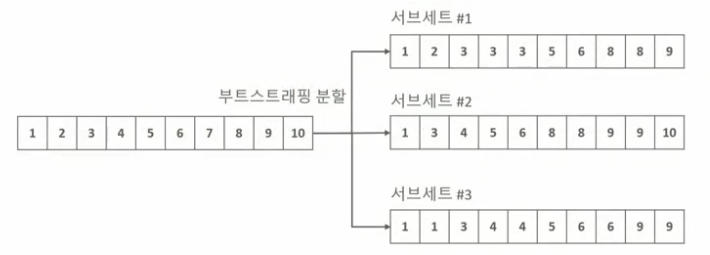

In [33]:
import pandas as pd

# 중복 피처 처리
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '-' + str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

# 학습 / 테스트 데이터셋 추출
def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                                  header = None, names = ['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 반환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습 / 테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:0.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9196


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝<br>
트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모됨<br>
트리 기반 자체의 하이퍼 파라미터가 원래 많은 데다 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 일반적으로 다른 ML 알고리즘에 비해 많을 수 밖에 없음<br>
그나마 랜덤 포레스트가 적은 편에 속하는데, 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문<br>
 * n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트는 100개임. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님. 또한, 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함. 보통 1000 ~ 2000개를 많이 사용함
 * max_features : 결정 트리에 사용된 max_features 파라미터와 같음. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같음. 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피저 개수)만큼 참조(즉, 전체 피처가 16개라면 분할을 위해 4개 참조). 각 서브세트마다 선택된 피처 종류는 다를 수 있음
 * max_depth, min_samples_leaf : 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용 가능

In [37]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[8, 16, 24],
          'min_samples_leaf':[1, 6, 12],
          'min_samples_split':[2, 8, 16]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1) # n_jobs는 CPU의 모든 프로세서를 사용 -> 더 빠르게 수행
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:0.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 : 0.9165


In [41]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16,
                                 min_samples_split = 2, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:0.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9260


In [42]:
# refit 되어있기 때문에 grid_cv에 바로 predict 해도 동일한 결과 반환
pred = grid_cv.predict(X_test)
print('예측 정확도 : {0:0.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9260


* 피처 중요도 

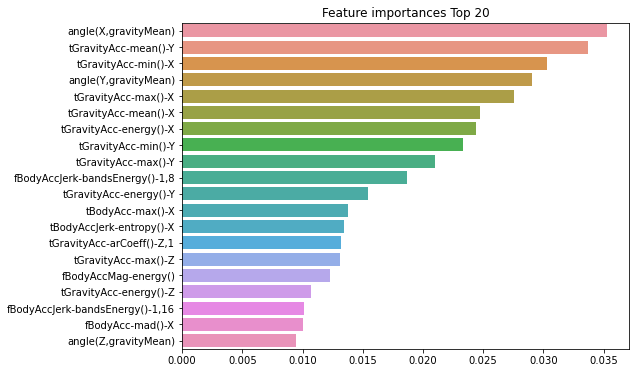

In [44]:
# 피처 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_ # ndarray를 반환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

# 5. GBM(Gradient Boosting Machine)

### GBM의 개요 및 실습
* 부스팅 (Boosting)
 * 앙상블의 또 다른 방법
 * 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터나 학습 트리에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
 * 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있음
 * AdaBoost는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

* 에이다 부스팅(AdaBoosting)의 학습/예측 프로세스<br>
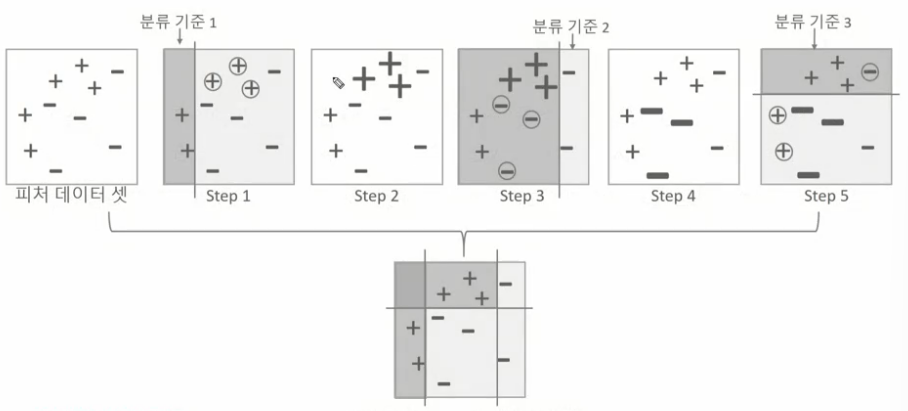<br>
맨 왼쪽 그림과 같이 +와 -로 된 피처 데이터 세트가 있다면<br>
* Step1에서 첫 번째 약한 학습기가 분류 기준 1로 +와 -를 분류한 것임. 동그라미로 표시된 + 데이터는 + 데이터가 잘못 분류된 오류 데이터
* Step2에서는 이 오류 데이터에 대해서 가중치 값을 부여함. 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐
* Step3는 두 번째 약한 학습기가 분류 기준 2로 +와 -로 분류하였음. 마찬가지로 동그라미로 표시된 - 데이터는 잘못 분류된 오류 데이터임
* Step4는 잘못 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여함
* Step5는 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터를 찾음. 에이다 부스트는 이렇게 약한 학습기가 순차적으로 오류값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행함
* 마지막으로 맨 아래에는 첫 번째, 두 번쩨, 세 번째 약한 학습기를 모두 결합한 결과 예측임. 개별 약한 학습기보다 훨씬 정확도가 높아짐<br>
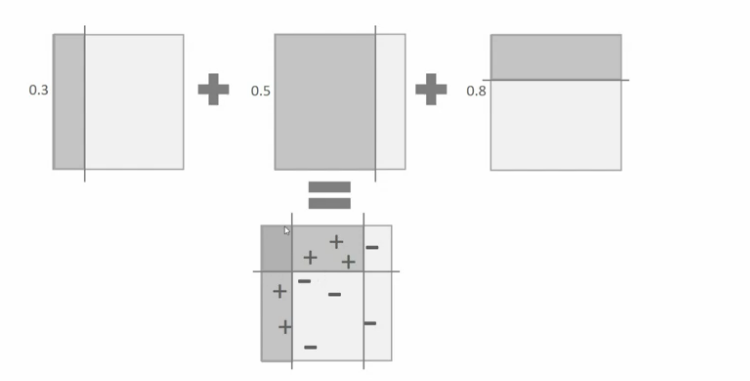<br>
개별 약한 학습기는 위 그림과 같이 각각 가중치를 부여해 결합함

* GBM(Gradient Boost Machine) 개요<br>
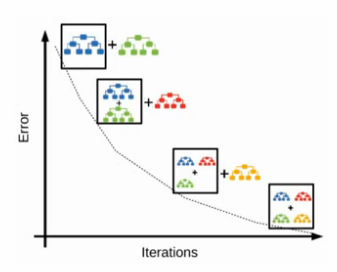<br>
 * GBM(Gradient Boost Machine)은 에이다부스트와 유사하나, 가중치 업데이터를 `경사 하강법(Gradient Descent)`을 이용(=> 오류값을 최소화하는 방향으로)하는 것이 큰 차이임
 * 오류 값은 (실제 값 - 예측값)임. 분류의 실제 결괏값을 y, 피처를 x1, x2, ..., xn, 그리고 이 피처에 기반한 예측 함수를 F(x) 함수라고 하면 오류식 h(x) = y - F(x)이 됨. 이 오류식 h(x) = y - F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법(Gradient Descent)임
 * 경사 하강법은 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법으로서 머신러닝에서 중요한 기법 중 하나
 * 사이킷런은 GBM 분류를 위해 GradientBoostingClassifier 클래스를 제공

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간을 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:0.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:0.1f} 초'.format(time.time() - start_time))

GBM 정확도 : 0.9389
GBM 수행 시간 : 1174.7 초


### GBM 하이퍼 파라미터 소개<br>
n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터는 결정 트리, 랜덤 포레스트에서 이미 많이 소개했으므로 생략<br>
* loss : 경사 하강법에서 사용할 비용 함수를 지정. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용
* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1임. 너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높음. 하지만 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고, 또 너무 작게 설정하면 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있음. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능
 * 보통 0.01 ~ 0.2 사이를 하이퍼 파라미터로 적용
 * weight에 학습률을 곱하면서 최소 오류 값을 찾아나가는데 너무 작은 학습률이면 최소 오류 값에 도달하지 못하고, 너무 큰 값이면 최소 오류 값을 찾지 못하고 뛰어넘고 다시 오류값이 상승할 수 있음<br>
 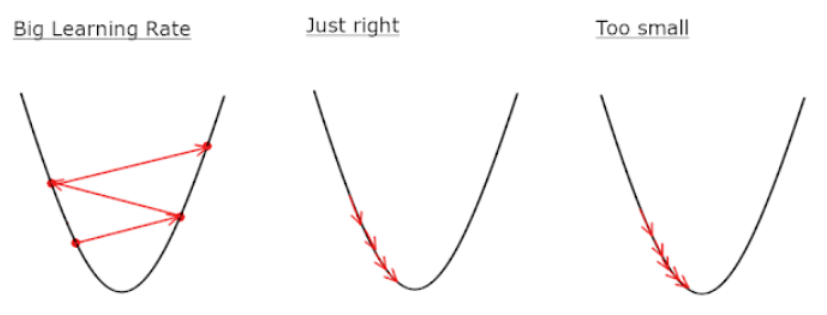<br>
* n_estimators : weak learner의 개수. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있음. 하지만 개수가 많을수록 수행 시간이 오래 걸림. 기본값은 100임
* subsample : weak learner가 학습에 사용하는 데이터 샘플링 비율. 기본값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미(0.5이면 학습 데이터의 50%). 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

In [ ]:
# 아래는 설명드리지는 않지만 GridSearchCV로 GBM의 하이퍼 파라미터 튜닝을 수행하는 예제
# 사이킷런이 1.X로 업그레이드 되어서 GBM의 학습 속도가 현저하게 저하되는 문제가 오히려 발생
# 아래는 수행시간이 오래 걸리므로 참고용으로만 사용하면 좋을 것 같음
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100, 500],
          'learning_rate':[0.05, 0.1]}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:0.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:0.4f}'.format(gb_accuracy))

=> GBM 수행시간이 굉장히 오래 걸림. 따라서 하이퍼 파라미터 튜닝은 따로 진행하지 않고 코드를 통해서만 살펴봄

# 6. XGBoost(eXtra Gradient Boost)

### XGBoost 개요
* 주요 장점
 * 뛰어난 예측 성능
 * GBM 대비 빠른 수행 시간
   * CPU 병렬 처리, GPU 지원
 * 다양한 성능 향상 기능
   * 규제(Regularization) 기능 탑재
   * Tree Pruning (가지치기, 노드들을 다 만들었다가 말단 노드부터 다시 한 번 검증해서 필요없다고 생각하면 가지쳐버림)
 * 다양한 편의 기능
   * 조기 중단(Early Stopping) - 정해진 n_estimators만큼 돌지 않고, 더이상 오류를 감소하는 것이 눈에 띄게 보이지 않는다면 최적이라고 판단하여 학습을 중단시킴
   * 자체 내장된 교차 검증
   * 결손값 자체 처리
<br><br>   
=> XGBoost 전용의 파이썬 패키지와 사이킷런과 호환되는 래퍼용 XGBoost가 함께 존재<br>
=> 전자는 XGBoost 고유의 프레임워크를 파이썬 언어 기반에서 구현한 것이므로 사이킷런 고유의 아키텍처인 fit(), predict()를 사용할 수 없음

### XGBoost 설치하기

* 아나콘다에서 설치<br>
`conda install -c anaconda py-xgboost`

* pip로 설치

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


* xgboost 모듈 임포트

In [51]:
import xgboost as xgb # 파이썬 wrapper
from xgboost import XGBClassifier # 사이킷런 wrapper

* XGBoost 파이썬 래퍼와 사이킷런 래퍼 API 비교<BR>
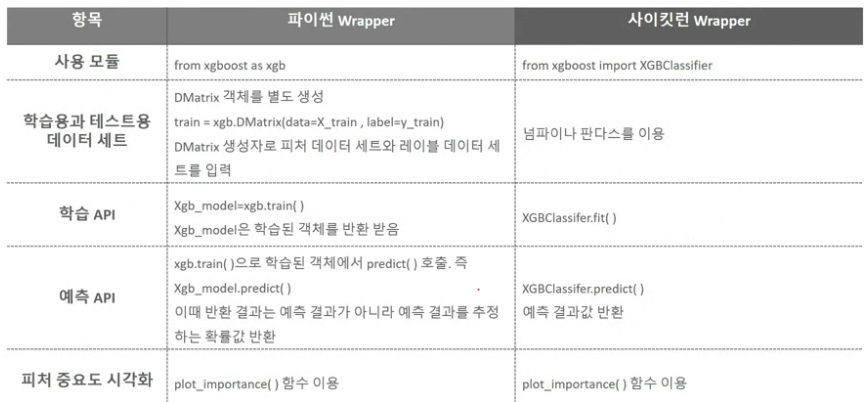<BR>
=> 파이썬 래퍼의 예측 API는 예측 확률값을 반환해 predict_proba() 와 동일 기능을 수행

* XGBoost 파이썬 래퍼와 사이킷런 래퍼 하이퍼 파라미터 비교<br>
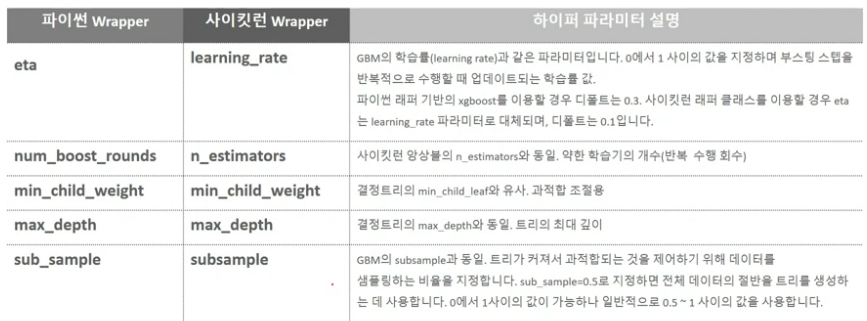<br>
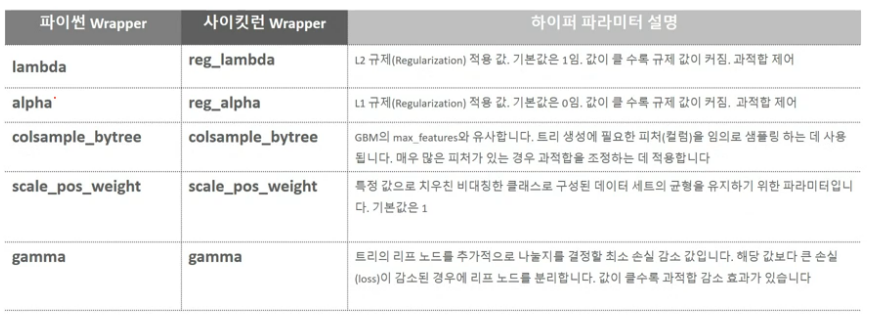<br>
=> 사이킷런 Wrapper의 경우 GBM에 동일한 하이퍼 파라미터가 있다면 이를 사용하고, 그렇지 않다면 파이썬 Wrapper의 하이퍼 파라미터를 사용<br>
=> min_child_weight는 weight가 특정 값을 넘어가면 child를 만들 것이냐, 안 만들 것이냐를 의미<br>
=> XGBoost는 regulation이 가능. 오차를 줄이기 위해 계속 학습을 하다보면 학습에만 몰두를 해 실제 검증, 테스트 데이터 세트에서 오버피팅이 발생할 가능성이 높음. 따라서 오차에 너무 집중하지 않게 제약을 거는 것임<br>
=> colsample_bytree는 학습을 할 때 전체 피처를 학습하지 않고 일부 피처만 학습 가능

* XGBoost 조기 중단 기능(Early Stopping)
 * XGBoost는 특정 반복 횟수만큼 더 이상 비용함수가 감소하지 않으면 지정된 반복횟수를 다 완료하지 않고 수행을 종료할 수 있음
 * 학습을 위한 시간을 단축시킬 수 있음. 특히 최적화 튜닝 단계에서 적절하게 사용 가능
 * 너무 반복 횟수를 단축할 경우 예측 성능 최적화가 안 된 상태에서 학습이 종료될 수 있으므로 유의 필요.
 * 조기 중단 설정을 위한 주요 파라미터
   * early_stopping_rounds : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복횟수
   * eval_metric : 반복 수행 시 사용하는 비용 평가 지표<br>
   
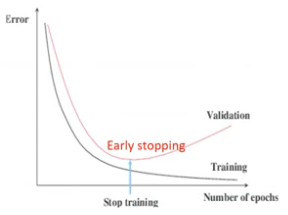<br>
=> 너무 학습 데이터에만 몰두하지 않도록 어느 정도 오류 감소율이 없다면 조기 중단

### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

* 데이터 세트 로딩하기

In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# XGBoost 패키지 로딩하기
import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


=> 종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로 되어 있음<br>
=> 타깃 레이블 값의 종류는 악성인 'malignant'가 0의 값으로, 양성인 'benign'이 1의 값으로 되어 있음

* 레이블 값의 분포 확인

In [55]:
print(dataset.target_names, '\n') # 'malignant'가 0이고, 'benign'이 1임
print(cancer_df['target'].value_counts()) 

['malignant' 'benign'] 

1    357
0    212
Name: target, dtype: int64


=> 양성이 357개, 악성이 212개로 구성

* 학습, 검증, 예측 데이터셋 분할

In [56]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 label이므로 Feature용 DataFrame은 cancer_df의 첫 번째 칼럼에서 맨 마지막 두번째 컬럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


=> 뒤에서 조기 중단 기능을 사용할 때 검증 데이터셋을 사용하기 위해 데이터를 분리

* 학습과 검증, 예측 데이터 세트를 DMatrix로 변환
 * DMatrix는 넘파이 array, DataFrame에서도 변환가능

In [59]:
# 학습, 검증, 테스트용 DMatrix 생성
# 현재 넣은 데이터는 다 데이터프레임이고, 문제없이 DMatrix로 변환됨
dtr = xgb.DMatrix(data = X_tr, label = y_tr) # 학습용 DMatrix 생성
dval = xgb.DMatrix(data = X_val, label = y_val) # 검증용 DMatrix 생성
dtest = xgb.DMatrix(data = X_test, label = y_test) # 예측용 DMatrix 생성

* 하이퍼 파라미터 설정

In [62]:
# eta는 learning rate로 학습률을 의미
# objective는 목적함수로, 예제 데이터가 0 또는 1인 이진 분류이므로 이진 로지스틱 사용
 # 각 반복(iteration)단계마다 학습을 해서 학습/검증 데이터를 이용해서 구한 예측치가 나오는데 이와 실제값의 차이를 loss라고 하는데 그 때 사용하는 예측함수가 목적함수
# 오류 함수 평가 성능 지표는 logloss
 # 각 반복마다 학습/검증 데이터를 이용한 loss 값이 반환되는데 그 때 loss를 구할 때 사용하는 함수를 logloss라고 지정
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'}
num_rounds = 400 # 사이킷런의 n_estimators와 같은 개념

* 주어진 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달하고 학습

In [63]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기해도 무방
eval_list = [(dtr, 'train'), (dval, 'eval')] # 또는 eval_list = [(dval, 'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
# 생성자를 생성할 때 하이퍼 파라미터를 넣는 사이킷런과 달리 파이썬 래퍼는 하이퍼 파라미터를 train() 함수를 호출할 때 넣음
# dtrain은 학습용 DMatrix 옵션
# num_boost_round는 약한 학습기의 개수를 결정하는 옵션
# early_stopping_rounds는 조기 중단을 위한 추가 횟수
# evals는 조기 중단을 결정하기 위해 사용되는 학습, 검증용 데이터 (검증용 데이터만 넣어도 됨)
xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = num_rounds,
                      early_stopping_rounds = 50, evals = eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086
[176]	train-logloss:0.01258	eval-logloss:0.26103


=> 400번을 하지 않고 176번에서 끝남<br>
=> 126번째의 logloss를 보면 그 이후부터 더이상 loss가 감소하지 않는 것을 볼 수 있음<br>
=> early_stopping_rounds인 50만큼 더 가봤더니 더 낮은 loss가 나오지 않기 때문에 더이상 반복하지 않고 종료시킴

* predict()를 통해 예측 확률값을 반환하고 예측값으로 변환

In [69]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3), '\n')

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 :', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001] 

예측값 10개만 표시 : [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


* get_clf_eval()을 통해 예측 평가

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC_AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion_matrix)
    
    # ROC_AUC print 추가
    print('정확도 : {0:0.4f}, 정밀도 : {1:0.4f}, 재현율 : {2:0.4f}, \
          F1 : {3:0.4f}, AUC : {4:0.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [74]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
<function confusion_matrix at 0x000001708115EEE0>
정확도 : 0.9561, 정밀도 : 0.9615, 재현율 : 0.9740,           F1 : 0.9677, AUC : 0.9937


* Feature Importance 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

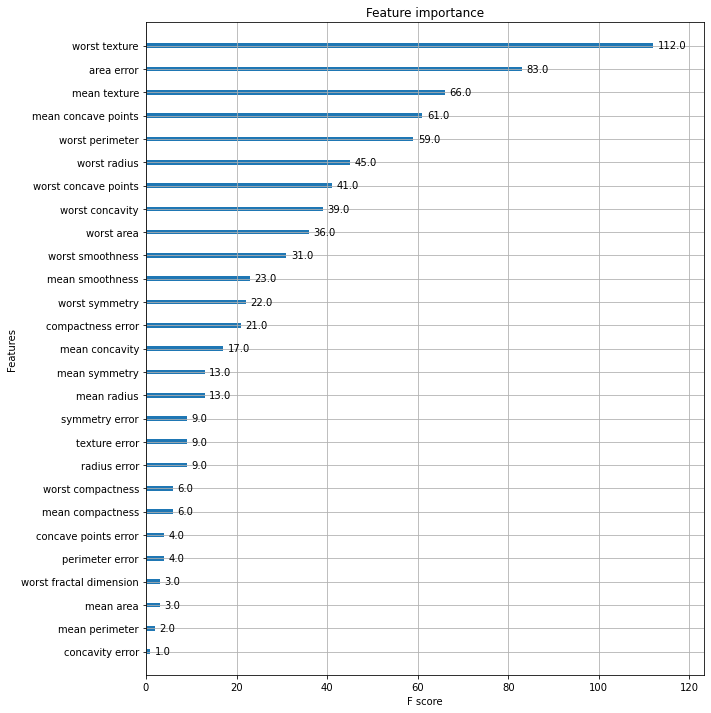

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax) # ax가 실제로 그림을 그리기 때문에 함수 안에 ax를 집어넣어줘야 함

=> 컬럼명이 자동으로 출력되는 것은 DMatrix가 DataFrame을 기반으로 만들어졌기 때문

### 사이킷런 래퍼 XGBoost의 개요 및 적용

* 사이킷런 래퍼 클래스 임포트, 학습 및 예측

In [88]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력, 미입력해도 수행에 문제 없음
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train, y_train, verbose = True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [91]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
<function confusion_matrix at 0x000001708115EEE0>
정확도 : 0.9649, 정밀도 : 0.9620, 재현율 : 0.9870,           F1 : 0.9744, AUC : 0.9954


* early stopping을 50으로 설정하고 재 학습/예측/평가하기

In [94]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
                eval_set = evals, verbose = True) # early_stopping은 학습 시 적용되기 때문에 fit 메서드에 추가
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

[130]	validation_0-logloss:0.01886	validation_1-logloss:0.25712
[131]	validation_0-logloss:0.01863	validation_1-logloss:0.25609
[132]	validation_0-logloss:0.01839	validation_1-logloss:0.25649
[133]	validation_0-logloss:0.01816	validation_1-logloss:0.25789
[134]	validation_0-logloss:0.01802	validation_1-logloss:0.25811
[135]	validation_0-logloss:0.01785	validation_1-logloss:0.25794
[136]	validation_0-logloss:0.01763	validation_1-logloss:0.25876
[137]	validation_0-logloss:0.01748	validation_1-logloss:0.25884
[138]	validation_0-logloss:0.01732	validation_1-logloss:0.25867
[139]	validation_0-logloss:0.01719	validation_1-logloss:0.25876
[140]	validation_0-logloss:0.01696	validation_1-logloss:0.25987
[141]	validation_0-logloss:0.01681	validation_1-logloss:0.25960
[142]	validation_0-logloss:0.01669	validation_1-logloss:0.25982
[143]	validation_0-logloss:0.01656	validation_1-logloss:0.25992
[144]	validation_0-logloss:0.01638	validation_1-logloss:0.26035
[145]	validation_0-logloss:0.01623	valid

=> train_loss는 계속 줄어들지만, validation_loss는 그렇지 않음

In [95]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
<function confusion_matrix at 0x000001708115EEE0>
정확도 : 0.9561, 정밀도 : 0.9615, 재현율 : 0.9740,           F1 : 0.9677, AUC : 0.9933


=> 파이썬 래퍼로 수행한 것과 동일한 결과가 나오는 것을 확인할 수 있음<br>
=> 현재, 데이터 수가 워낙 작기 때문에 조기 중단을 위한 검증 데이터를 분리하면 검증 데이터가 없는 학습 데이터를 사용했을 때보다 성능이 약간 저조함

* early stopping을 10으로 설정하고 재학습/예측/평가
 * early stopping을 작게 주는 이유 : 하이퍼 파라미터 튜닝을 빠르게 해야 하는 경우

In [97]:
# early stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 10,
                eval_metric = 'logloss', eval_set = evals, verbose = True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [98]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
<function confusion_matrix at 0x000001708115EEE0>
정확도 : 0.9474, 정밀도 : 0.9610, 재현율 : 0.9610,           F1 : 0.9610, AUC : 0.9933


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

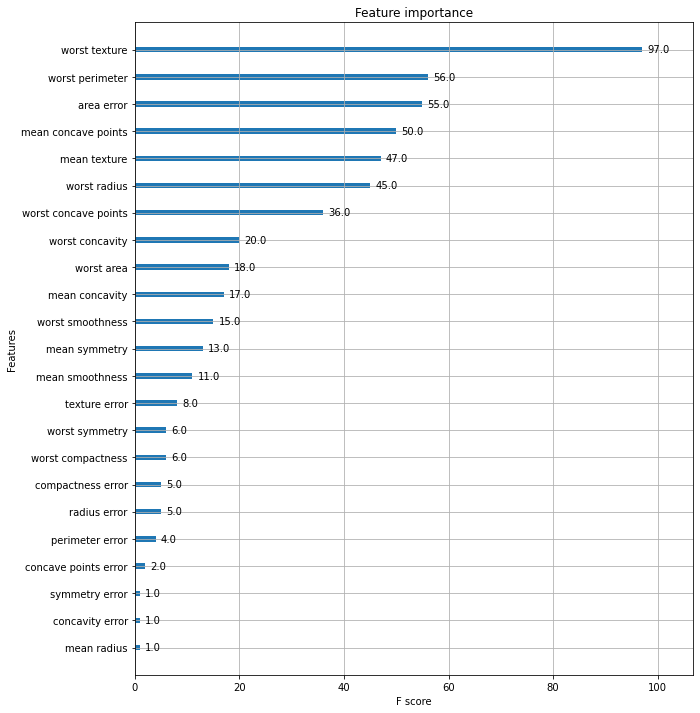

In [99]:
# 피처 중요도 확인

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))

# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax = ax)